In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score, roc_auc_score, matthews_corrcoef
from sklearn import tree


In [2]:
df = pd.read_csv('threats.csv')
li = [str(i) for i in range(88)]
df = df.dropna(subset=li)

In [3]:
df.dtypes

0         float64
1         float64
2         float64
3         float64
4         float64
           ...   
84        float64
85        float64
86        float64
87        float64
Threat      int64
Length: 89, dtype: object

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,79,80,81,82,83,84,85,86,87,Threat
0,-0.01,-0.43,2.22,-0.59,0.80,0.21,-0.19,0.30,-0.25,0.42,...,-0.07,0.30,-0.19,0.61,-0.04,0.36,-0.18,-0.24,0.07,0
1,0.00,-4.11,1.48,0.92,-7.37,0.60,0.37,1.95,0.19,0.85,...,-0.57,-0.27,1.17,-0.52,-1.43,-0.24,-0.41,0.71,-0.22,0
2,0.01,-5.03,-2.78,-0.83,0.92,0.46,0.10,1.36,-0.74,1.62,...,-0.13,0.33,0.38,0.41,-0.61,0.24,-0.10,-1.19,0.37,0
3,-0.02,1.98,2.30,0.87,-7.09,0.36,0.16,1.79,0.23,0.26,...,0.07,0.41,-0.81,-0.49,0.07,-0.20,-0.31,-0.55,0.18,0
4,-0.01,0.14,-2.43,-0.68,0.73,-1.47,0.68,1.93,-0.35,3.12,...,-0.04,0.03,0.07,-0.05,-0.02,-0.01,0.00,-0.20,0.07,0


In [5]:
X = df.drop('Threat', axis = 1).copy()
X.head()

,0,1,2,3,4,5,6,7,8,9,...,78,79,80,81,82,83,84,85,86,87
0,-0.01,-0.43,2.22,-0.59,0.80,0.21,-0.19,0.30,-0.25,0.42,...,-1.82,-0.07,0.30,-0.19,0.61,-0.04,0.36,-0.18,-0.24,0.07
1,0.00,-4.11,1.48,0.92,-7.37,0.60,0.37,1.95,0.19,0.85,...,-0.30,-0.57,-0.27,1.17,-0.52,-1.43,-0.24,-0.41,0.71,-0.22
2,0.01,-5.03,-2.78,-0.83,0.92,0.46,0.10,1.36,-0.74,1.62,...,-0.72,-0.13,0.33,0.38,0.41,-0.61,0.24,-0.10,-1.19,0.37
3,-0.02,1.98,2.30,0.87,-7.09,0.36,0.16,1.79,0.23,0.26,...,0.29,0.07,0.41,-0.81,-0.49,0.07,-0.20,-0.31,-0.55,0.18
4,-0.01,0.14,-2.43,-0.68,0.73,-1.47,0.68,1.93,-0.35,3.12,...,-0.09,-0.04,0.03,0.07,-0.05,-0.02,-0.01,0.00,-0.20,0.07


In [6]:
Y = df['Threat'].copy()
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Threat, dtype: int64

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)


In [8]:
clf_dt = DecisionTreeClassifier()
clf_dt = clf_dt.fit(X_train, Y_train)

In [9]:
predictions = clf_dt.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, predictions)

0.995648

In [10]:
confusion_matrix(Y_test, predictions, labels=[0, 1])

array([[248909,    595],
       [   493,      3]], dtype=int64)

In [16]:
print("f1 score(macro):",f1_score(Y_test, predictions, average='macro'))
print("f1 score(micro):",f1_score(Y_test, predictions, average='micro'))
print("f1 score(weighted):",f1_score(Y_test, predictions, average='weighted'))
print("roc auc score:",roc_auc_score(Y_test, predictions))
print("matthews correlation coefficient:",matthews_corrcoef(Y_test, predictions))

f1 score(macro): 0.5016518445832975
f1 score(micro): 0.995648
f1 score(weighted): 0.9958504362926266
roc auc score: 0.5018318278949306
matthews correlation coefficient: 0.0033372881041063393


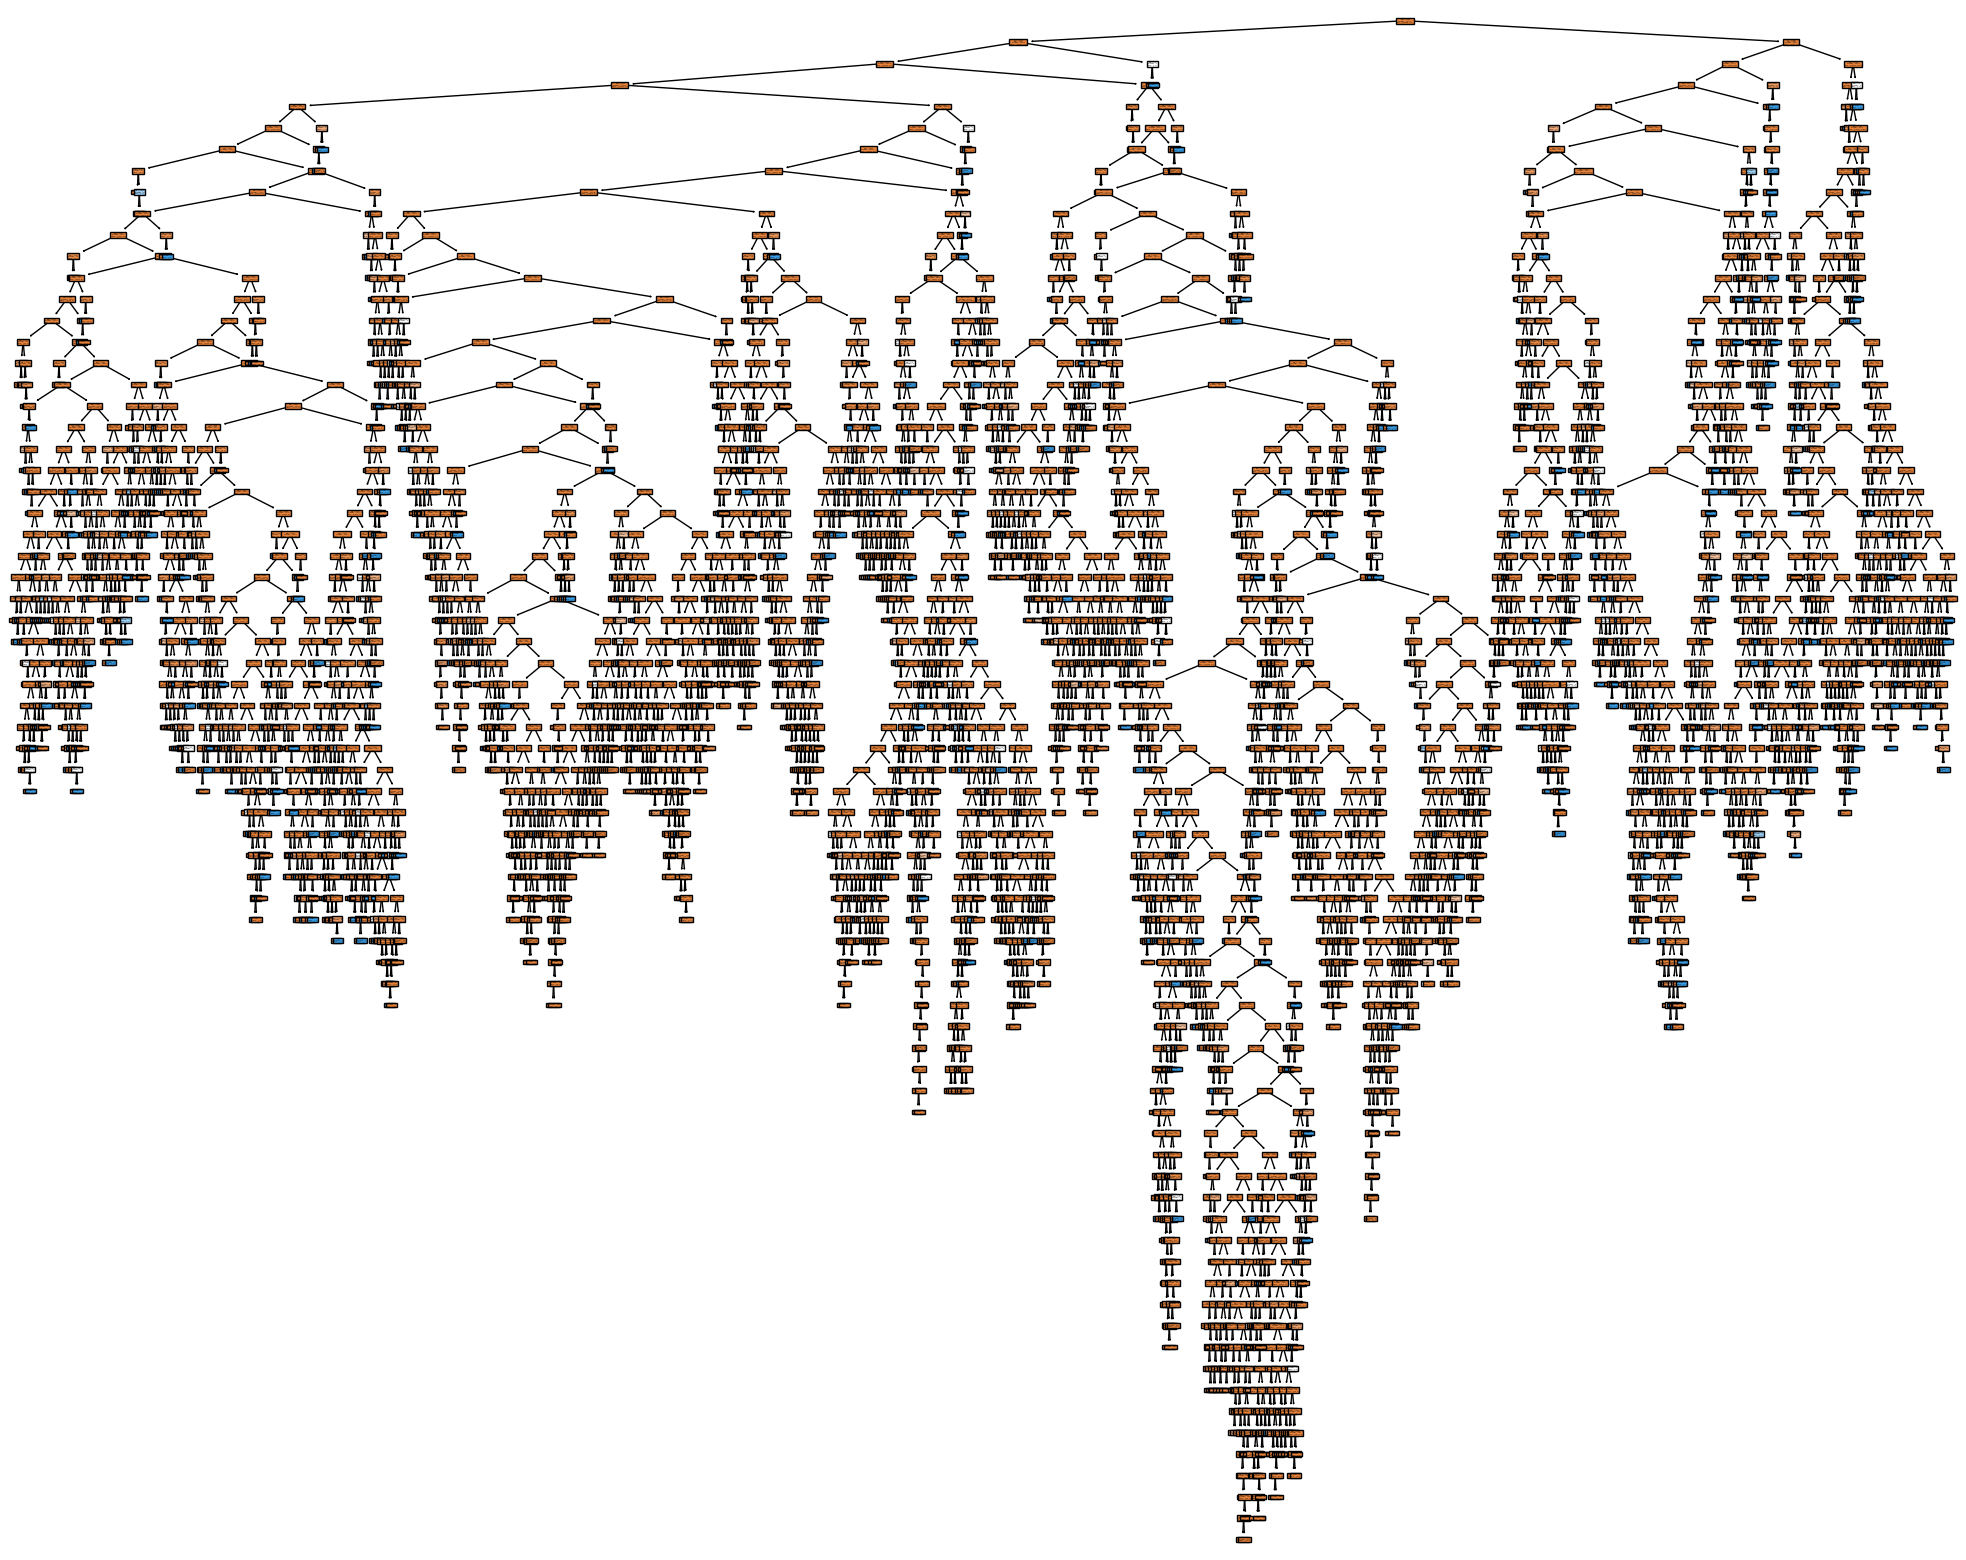

In [19]:
feature_names = X.columns
fig = plt.figure(figsize=(25,20))
tree.plot_tree(clf_dt, feature_names=feature_names, filled=True)
plt.show()